# Solutions 1


## Exercise 1

Complete the code below to plot the intrinsic payoff of a European call option with strike 100
for a the value of the underlying varying from 0 to 200 in steps of size 1.
In the same figure, using Black-Scholes formula with the inputs provided, plot the value of the option for the varying underlying value.

In a second figure, plot the intrinsic payoff and the values function of a European put option with strike 100 with the same parameters.

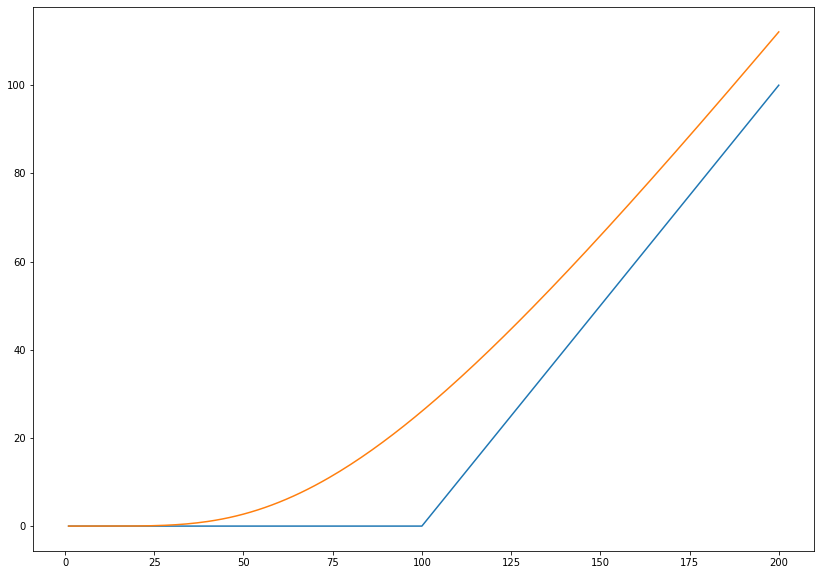

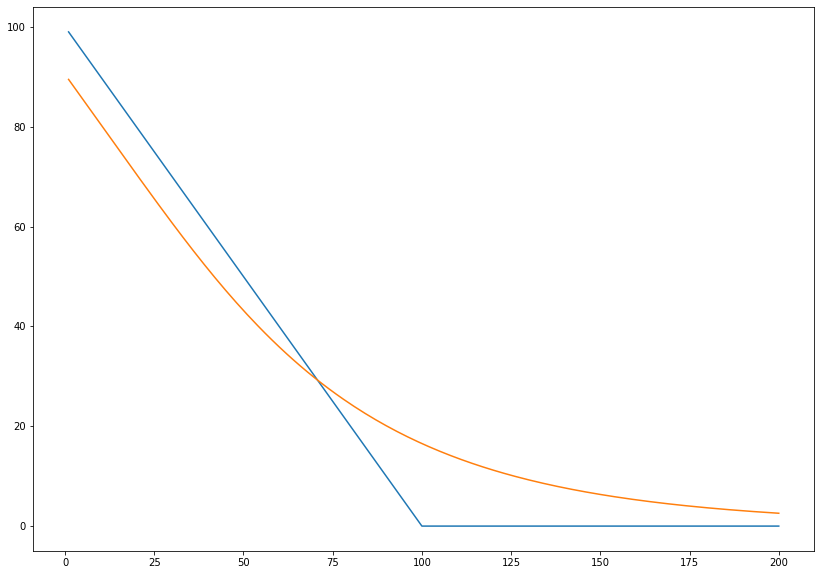

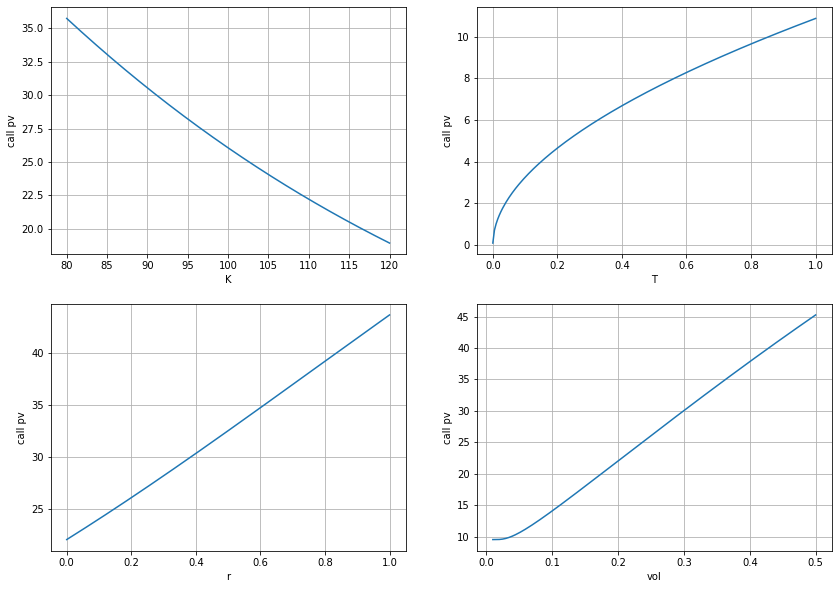

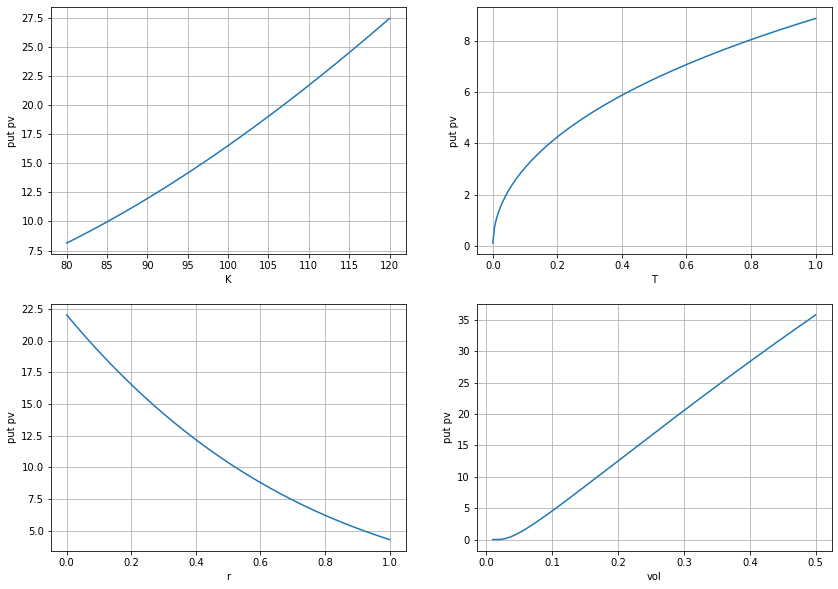

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)

K = 100
T = 5
r = 0.02
vol = 0.25

def bs_d1(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol*np.sqrt(T))        
    return d1

def bs_d2(d1, vol, T):
    d2 = d1 - vol*np.sqrt(T)     
    return d2

def bs_call_value(S, K, T, r, vol):
    '''Computes BSM European call option value'''
    
    d1 = bs_d1(S, K, T, r, vol)
    d2 = bs_d2(d1, vol, T)
    call = S * stats.norm.cdf(d1) - K * np.exp(-r*T) * stats.norm.cdf(d2)
    
    return call

def bs_put_value(S, K, T, r, vol):
    '''Computes BSM European put option value'''
    
    # using call-put parity formula
    call = bs_call_value(S,K,T,r,vol)
    put = call - S + K * np.exp(-r*T)

    return put

S = np.linspace(1, 200, 200)

call_payoffs = np.maximum(S-K, 0)
call_values = bs_call_value(S, K, T, r, vol)

put_payoffs = np.maximum(K-S, 0)
put_values = bs_put_value(S, K, T, r, vol)

plt.figure()
plt.plot(S, call_payoffs)
plt.plot(S, call_values)
plt.show()


plt.figure()
plt.plot(S, put_payoffs)
plt.plot(S, put_values)
plt.show()


#### END OF EXERCISE
#### YOU DON'T NEED TO CHANGE ANYTHING IN THE REST OF THIS CELL
#### THIS IS JUST FOR YOU TO VISUALIZE THE RESULTS

def plot_function(function, option_type):
    points = 200
    S = 100
    K = 100
    T = 5
    r = 0.02
    vol = 0.25

    fig,ax = plt.subplots(2,2)

    # C(K) plot
    klist = np.linspace(80, 120, points)
    vlist = [function(S, K, T, r, vol) for K in klist]
    ax[0,0].plot(klist, vlist)
    ax[0,0].grid(True)
    ax[0,0].set_xlabel('K')
    ax[0,0].set_ylabel(option_type+' pv')

    # C(T) plot
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(S, K, T, r, vol) for T in tlist]
    ax[0,1].plot(tlist, vlist)
    ax[0,1].grid(True)
    ax[0,1].set_xlabel('T')
    ax[0,1].set_ylabel(option_type+' pv')

    # C(r) plot
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(S, K, T, r, vol) for r in rlist]
    ax[1,0].plot(tlist, vlist)
    ax[1,0].grid(True)
    ax[1,0].set_xlabel('r')
    ax[1,0].set_ylabel(option_type+' pv')    

    # C(sigma) plot
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(S, K, T, r, vol) for vol in slist]
    ax[1,1].plot(slist, vlist)
    ax[1,1].grid(True)
    ax[1,1].set_xlabel('vol')
    ax[1,1].set_ylabel(option_type+' pv')    


plot_function(bs_call_value, 'call')
plot_function(bs_put_value, 'put')

## Exercise 2

Implement the Black-Scholes-Merton greek formulas below.

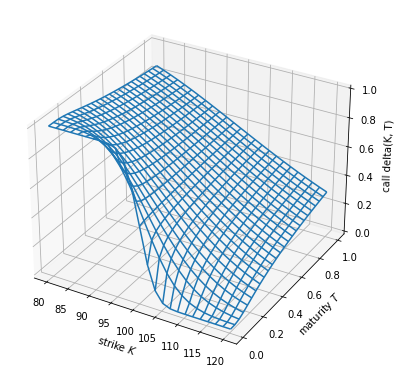

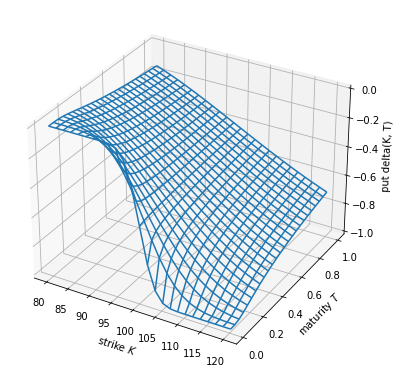

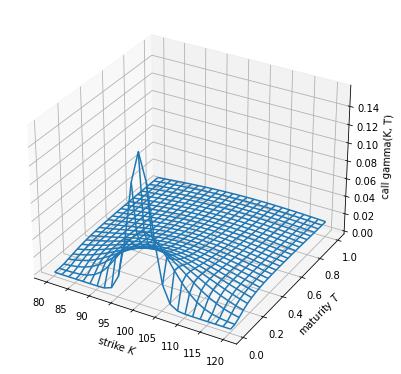

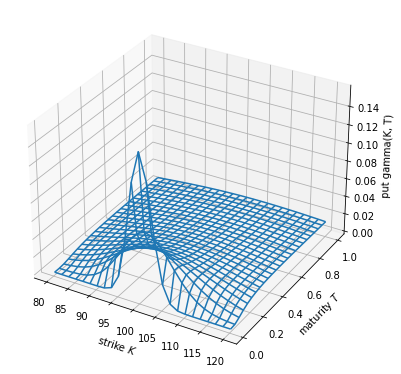

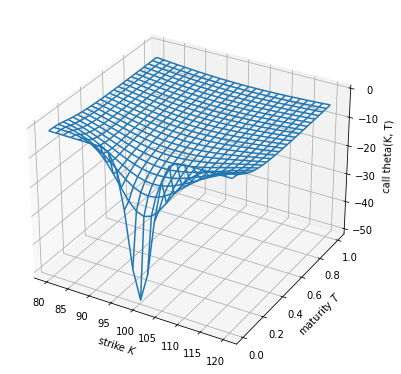

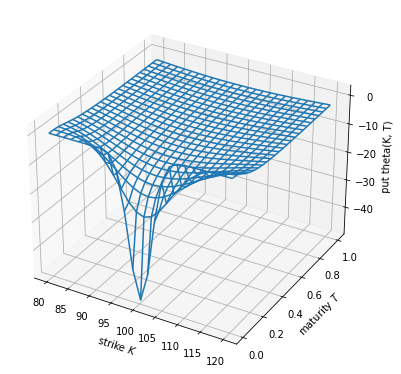

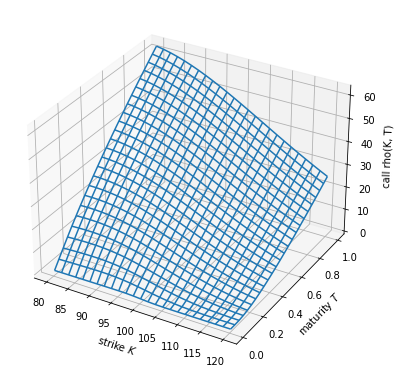

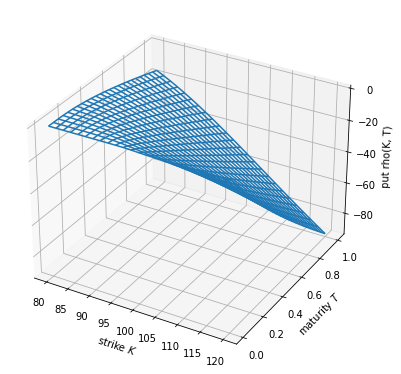

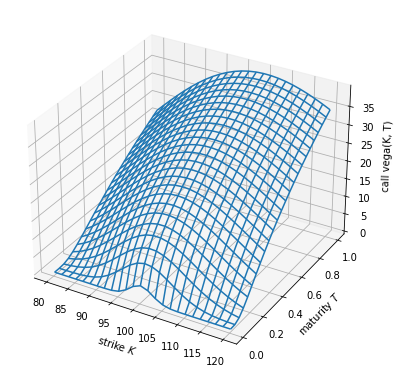

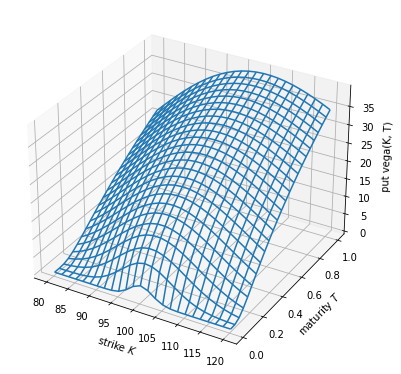

In [2]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from scipy import stats

def bs_call_delta(S, K, T, r, vol):
    '''Computes BSM European call option delta'''
    
    d1 = bs_d1(S, K, T, r, vol)
    return stats.norm.cdf(d1)

def bs_call_gamma(S, K, T, r, vol):
    '''Computes BSM European call option gamma'''
    
    d1 = bs_d1(S, K, T, r, vol)
    gamma = stats.norm.pdf(d1) / (S * vol * np.sqrt(T))

    return gamma
    

def bs_call_theta(S, K, T, r, vol):
    '''Computes BSM European call option theta'''
    
    d1 = bs_d1(S, K, T, r, vol)
    d2 = bs_d2(d1, vol, T)
    a = - 0.5 * S * vol * stats.norm.pdf(d1) / np.sqrt(T)
    b = - r * K * np.exp(-r*T) * stats.norm.cdf(d2)

    return a + b

def bs_call_rho(S, K, T, r, vol):
    '''Computes BSM European call option rho'''
    
    d1 = bs_d1(S, K, T, r, vol)
    d2 = bs_d2(d1, vol, T)
    return K * T * np.exp(-r*T) * stats.norm.cdf(d2)

def bs_call_vega(S, K, T, r, vol):
    '''Computes BSM European call option vega'''
    
    d1 = bs_d1(S, K, T, r, vol)
    return S * stats.norm.pdf(d1) * np.sqrt(T)
    

def bs_put_delta(S, K, T, r, vol):
    '''Computes BSM European put option delta'''
    
    call_delta = bs_call_delta(S, K, T, r, vol)
    return call_delta - 1

def bs_put_gamma(S, K, T, r, vol):
    '''Computes BSM European put option gamma'''
    
    return bs_call_gamma(S, K, T, r, vol)

def bs_put_theta(S, K, T, r, vol):
    '''Computes BSM European put option theta'''
    
    d1 = bs_d1(S, K, T, r, vol)
    d2 = bs_d2(d1, vol, T)
    a = - 0.5 * S * vol * stats.norm.pdf(d1) / np.sqrt(T)
    b = r * K * np.exp(-r*T) * stats.norm.cdf(-d2)
    
    return a + b

def bs_put_rho(S, K, T, r, vol):
    '''Computes BSM European put option rho'''
    
    d1 = bs_d1(S, K, T, r, vol)
    d2 = bs_d2(d1, vol, T)
    return -K * T * np.exp(-r*T) * stats.norm.cdf(-d2)

def bs_put_vega(S, K, T, r, vol):
    '''Computes BSM European put option vega'''
    
    return bs_call_vega(S, K, T, r, vol)


#### END OF EXERCISE
#### YOU DON'T NEED TO CHANGE ANYTHING IN THE REST OF THIS CELL
#### THIS IS JUST FOR YOU TO VISUALIZE THE RESULTS

def plot_greeks(function, greek):
    
    S = 100
    r = 0.02
    vol = 0.25
    
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(S, klist[j], tlist[i], r, vol)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

plot_greeks(bs_call_delta, 'call delta')
plot_greeks(bs_put_delta, 'put delta')

plot_greeks(bs_call_gamma, 'call gamma')
plot_greeks(bs_put_gamma, 'put gamma')

plot_greeks(bs_call_theta, 'call theta')
plot_greeks(bs_put_theta, 'put theta')

plot_greeks(bs_call_rho, 'call rho')
plot_greeks(bs_put_rho, 'put rho')

plot_greeks(bs_call_vega, 'call vega')
plot_greeks(bs_put_vega, 'put vega')
